In [18]:
import pandas as pd
import numpy as np
from numpy.random import normal, seed

from scipy import stats
from scipy.stats import norm

import statsmodels.api as sm
from statsmodels.graphics.tsaplots import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

from statsmodels.tsa.stattools import adfuller, coint
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.tsa.arima_model import ARMA, ARIMA

from datetime import datetime

import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Image

## Correlation & Autocorrelation:

- Correlation among two variables -> More sensible to check on returns, pct_changes...

In [5]:
google = pd.read_csv("google.csv", parse_dates = ["Date"], index_col = "Date").drop("Volume", axis = 1)
google.head()

,Open,High,Low,Close
Date,,,,
2017-01-03,778.81,789.63,775.80,786.14
2017-01-04,788.36,791.34,783.16,786.90
2017-01-05,786.08,794.48,785.02,794.02
2017-01-06,795.26,807.90,792.20,806.15
2017-01-09,806.40,809.97,802.83,806.65


In [6]:
google = google[["Low", "High"]]
google["Low_ret"] = google["Low"].pct_change()
google["High_ret"] = google["High"].pct_change()

google["Low_ret"].corr(google["High_ret"])

0.7781785960749882

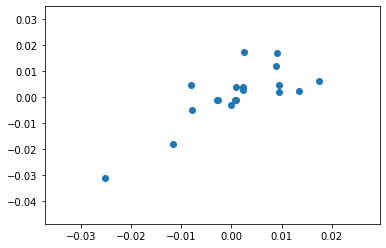

In [7]:
plt.scatter(google["Low_ret"], google["High_ret"]); plt.show()

### Simple Linear Regression:

In [21]:
import statsmodels.api as sm

google = sm.add_constant(google)
google.dropna(inplace = True)

results = sm.OLS(google.Low_ret, google[["const", "High_ret"]]).fit()

print(results.params[0])
print(results.params[1])

print(f"Correlation is square toot of R'2... corr: {google.Low_ret.corr(google.High_ret)} = r: {np.sqrt(results.rsquared)}")
results.summary()

0.00046037509101490987
0.6957689888400014
Correlation is square toot of R'2... corr: 0.7781785960749882 = r: 0.7781785960749881


C:\Users\okana\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1604: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=19
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Low_ret   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.582
Method:                 Least Squares   F-statistic:                     26.10
Date:                Sat, 11 Dec 2021   Prob (F-statistic):           8.73e-05
Time:                        03:41:36   Log-Likelihood:                 70.245
No. Observations:                  19   AIC:                            -136.5
Df Residuals:                      17   BIC:                            -134.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0005      0.001      0.315      0.756      -0.003       0.004
High_ret       0.6958      0.136      5.109      0.000       0.408       0.983
==============================================================================
Omnibus:                        0.986   Durbin-Watson:                   2.421
Prob(Omnibus):                  0.611   Jarque-Bera (JB):                0.314
Skew:                           0.312   Prob(JB):                        0.855
Kurtosis:                       3.087   Cond. No.                         93.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Autocorrelation:

- Correlation of a time series with its lagged-copy...

- Negative: Mean Reverting
- Positive: Trend Following

In [27]:
print(google.Low.autocorr())
print(google.Low.diff().autocorr())
print(google.Low.pct_change().autocorr())

0.7679458028834261
0.4700422679713392
0.46895296200286846


In [40]:
acf(google.Low.diff().dropna())

C:\Users\okana\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\stattools.py:660: FutureWarning: The default number of lags is changing from 40 tomin(int(10 * np.log10(nobs)), nobs - 1) after 0.12is released. Set the number of lags to an integer to  silence this warning.
  FutureWarning,
C:\Users\okana\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\stattools.py:669: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  FutureWarning,


array([ 1.        ,  0.4468026 ,  0.00126962, -0.24666345, -0.30136184,
       -0.2445395 ,  0.00723787, -0.01003986, -0.0045241 ,  0.07923424,
        0.07523882,  0.15555505,  0.14624676, -0.02945074, -0.24189159,
       -0.23166911, -0.08850314, -0.01294164])

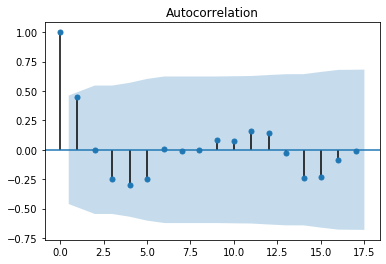

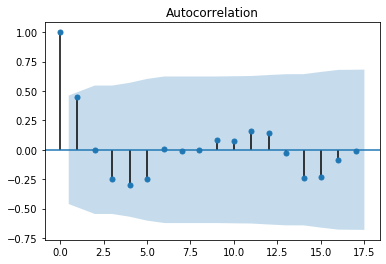

In [38]:
plot_acf(google.Low.diff().dropna(), lags = 17, alpha = 0.05)

## White Noise:

- Constant Mean
- Constant Variance
- Zero autocorrelation at all lags

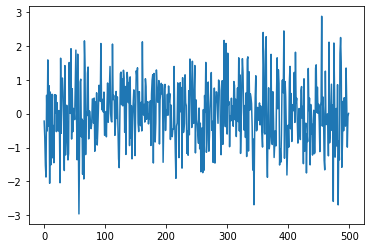

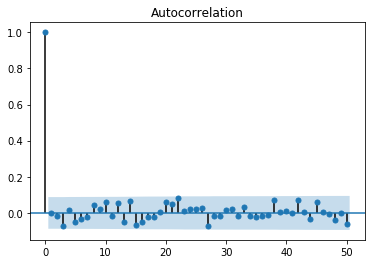

In [43]:
noise = np.random.normal(loc = 0, scale = 1, size = 500)
plt.plot(noise); plt.show()

plot_acf(noise, lags = 50); plt.show()

## Random Walk:

- Where the change between consecutive values are just white noises...

### Dickey-Fuller Test (If H1-one sided: Augmented Dickey-Fuller):

If you want to test if a series is a random walk: 

Simply regress difference between values on previous value and check the slope coefficient is 0 or not and its significance.

In [45]:
adfuller(noise) # coeff, p-value,...

(-22.262833569824185,
 0.0,
 0,
 499,
 {'1%': -3.4435228622952065,
  '5%': -2.867349510566146,
  '10%': -2.569864247011056},
 1316.515197146631)

## Stationary:

- Strong: Entire distribution is independent of time
- Weak: Mean, Variance & Autocorrelation are independent of time

## From Nonstationary to Stationary:

- differencing / seasonal differencing
- log transformation (i.e. for exponentially growing series)

## Auto-Regressive Model:

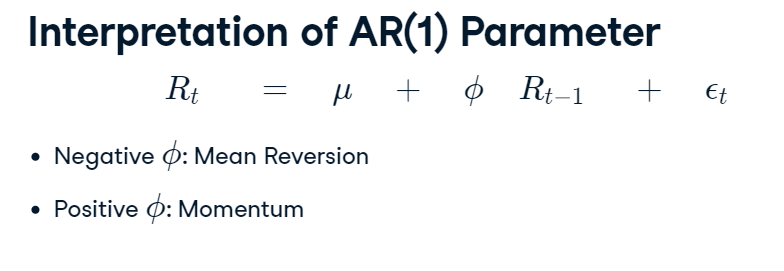

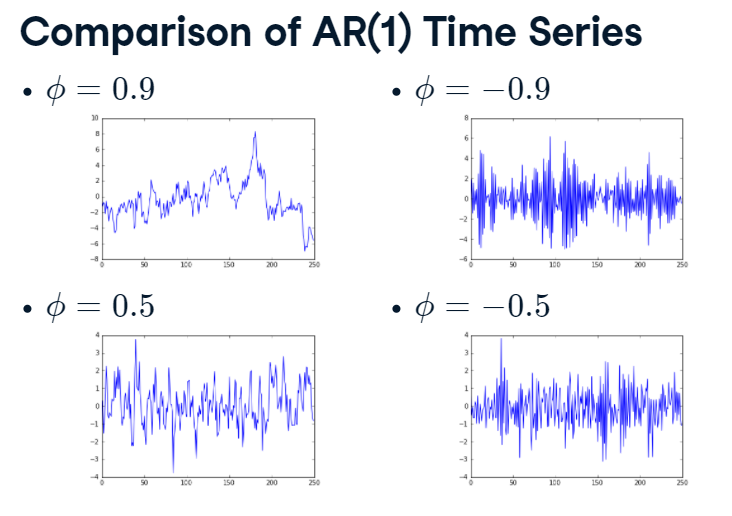

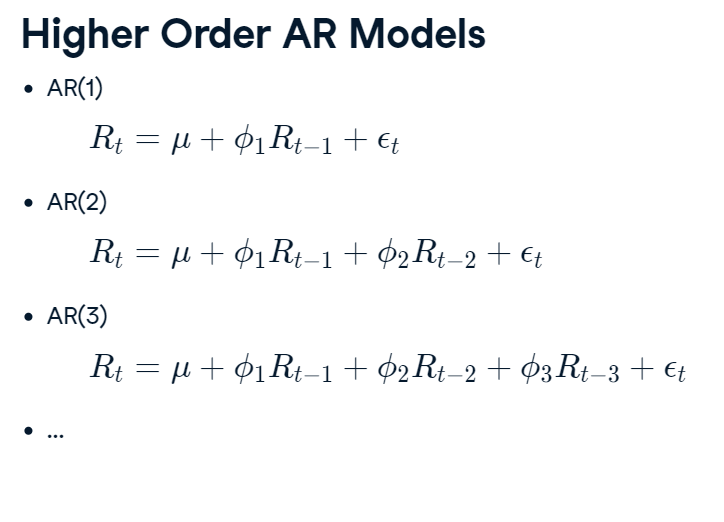

In [48]:
display(Image("./Image/AR.png"))
display(Image("./Image/AR_example.png"))
display(Image("./Image/AR_High.png"))

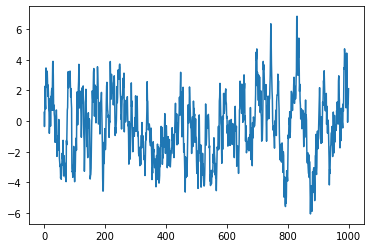

In [50]:
ar = np.array([1, -0.9]) # first is lag-0, the second one is the negative of what is considered!!!
ma = np.array([1])

AR_object = ArmaProcess(ar, ma)
simulated_data = AR_object.generate_sample(nsample = 1000)

plt.plot(simulated_data); plt.show()

In [65]:
simulated_data = pd.Series(simulated_data, index = pd.date_range(start = "2013-01-01", periods = 1000, freq= "D"))

mod = ARMA(simulated_data, order = (1, 0)) # AR(1) Model --MA(0)
result = mod.fit()
result.params

const     -0.312562
ar.L1.y    0.873995
dtype: float64

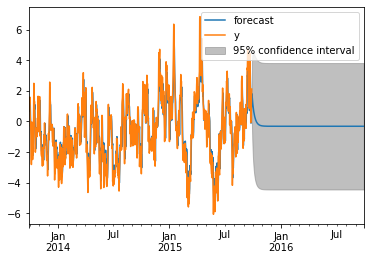

In [71]:
result.plot_predict(start = "2013-09-28", end = "2016-09-28"); plt.show()

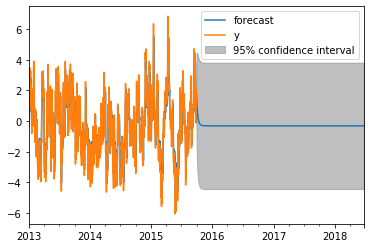

In [72]:
result.plot_predict(start = 0, end = 2000); plt.show()

## Choosing the Right Model:

### PACF:

- How is the effect of adding ith lag when (i-1) lags already exist. (Incremental)

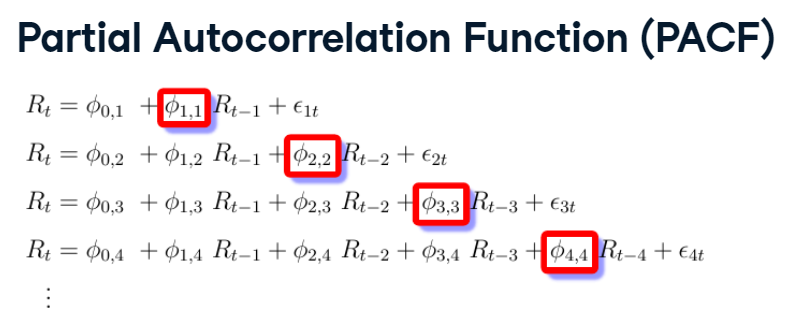

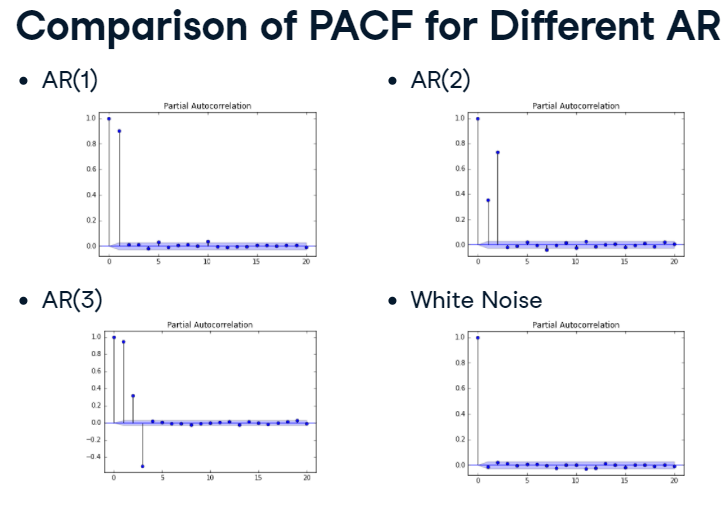

In [79]:
display(Image("./Image/PACF.png"))
display(Image("./Image/PACF_Comparison.png"))

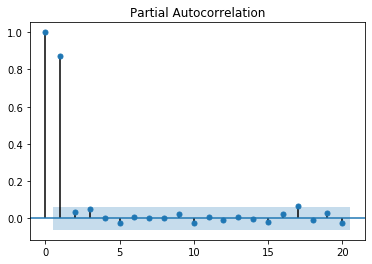

In [78]:
plot_pacf(simulated_data, alpha = 0.05, lags = 20); plt.show()

### Information

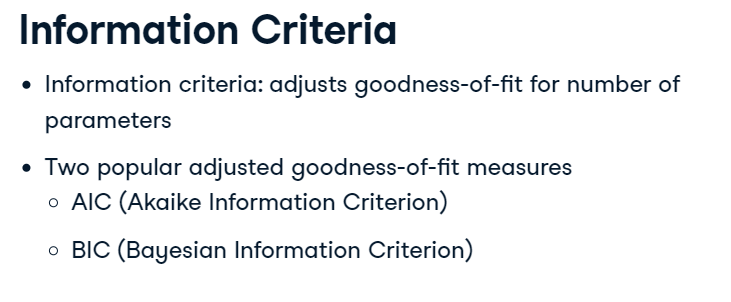

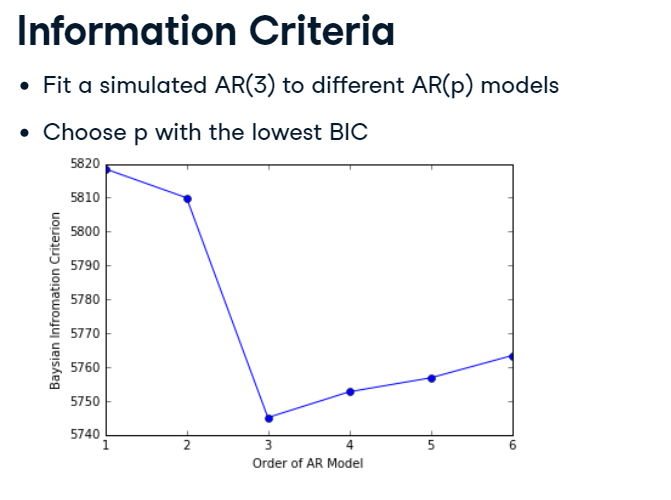

In [83]:
display(Image("./Image/IC.png"))
display(Image("./Image/IC_Select.png"))

In [82]:
print(result.aic)
print(result.bic)

2894.138466194923
2908.861732031869


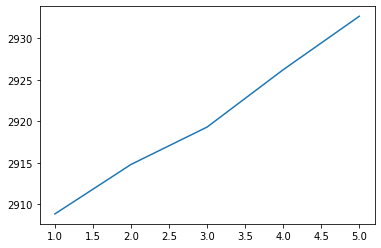

In [85]:
bic_list = []
for p in range(1,6):
    mod = ARMA(simulated_data, order = (p, 0)) 
    result = mod.fit()
    bic_list.append(result.bic)
    
plt.plot(range(1,6), bic_list)
plt.show()

## Moving Average:

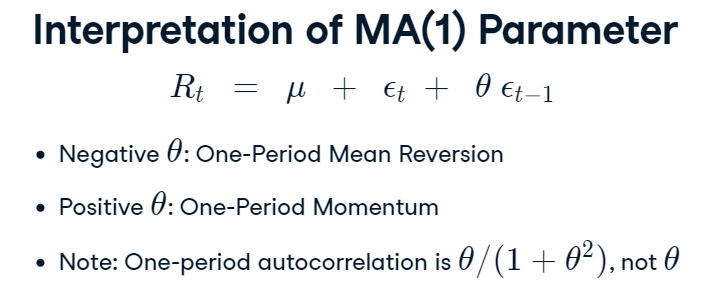

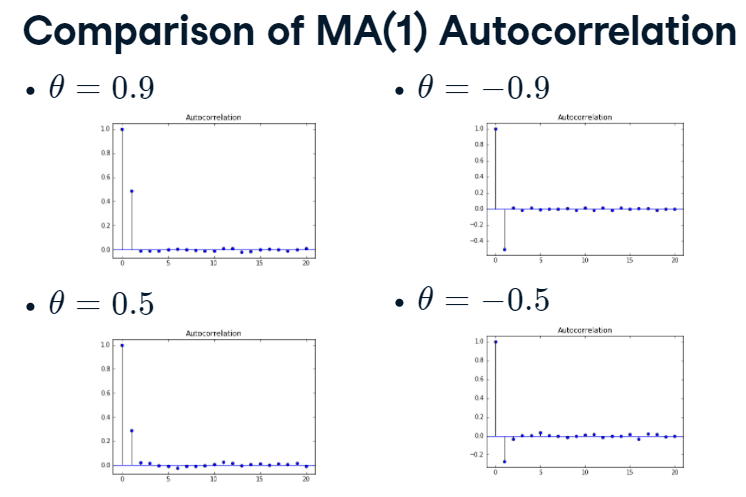

In [87]:
display(Image("./Image/MA.png"))
display(Image("./Image/MA_Compare.png"))

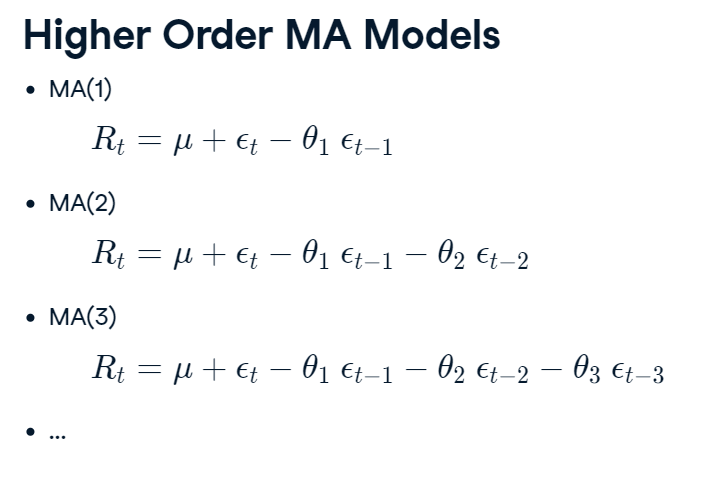

In [88]:
display(Image("./Image/MA_High.png"))

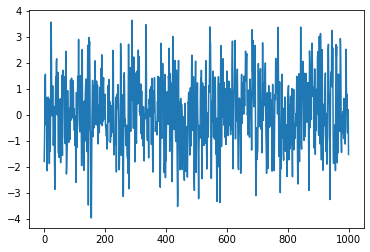

In [2]:
ar = np.array([1]) 
ma = np.array([1, 0.9]) # first is lag-0, the second one is the exact sign of what is considered!!!

AR_object = ArmaProcess(ar, ma)
simulated_data = AR_object.generate_sample(nsample = 1000)

plt.plot(simulated_data); plt.show()

In [3]:
mod = ARMA(simulated_data, order = (0, 1))
result = mod.fit()
result.summary()

C:\Users\okana\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                      y   No. Observations:                 1000
Model:                     ARMA(0, 1)   Log Likelihood               -1396.346
Method:                       css-mle   S.D. of innovations              0.977
Date:                Sun, 12 Dec 2021   AIC                           2798.692
Time:                        20:16:50   BIC                           2813.415
Sample:                             0   HQIC                          2804.288
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0889      0.059      1.504      0.133      -0.027       0.205
ma.L1.y        0.9156      0.012     73.666      0.000       0.891       0.940
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1           -1.0922           +0.0000j            1.0922            0.5000
-----------------------------------------------------------------------------
"""

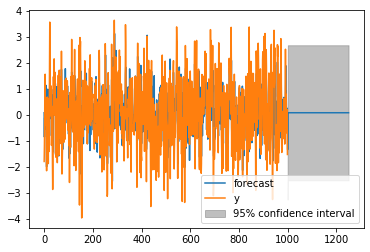

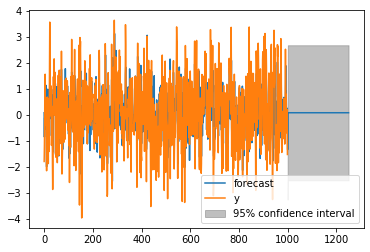

In [5]:
result.plot_predict(start = 0, end = 1250)

## ARMA Models:

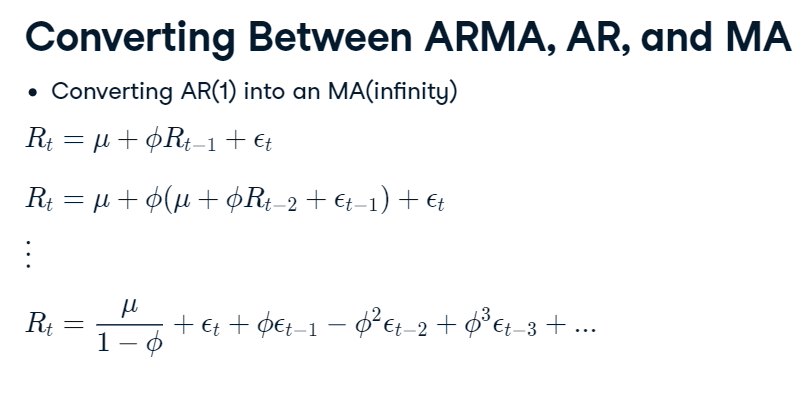

In [6]:
display(Image("./Image/ARMA.png"))

## Cointegration Models:

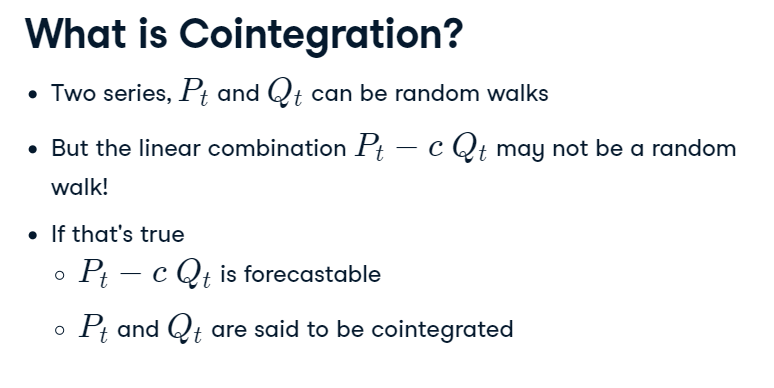

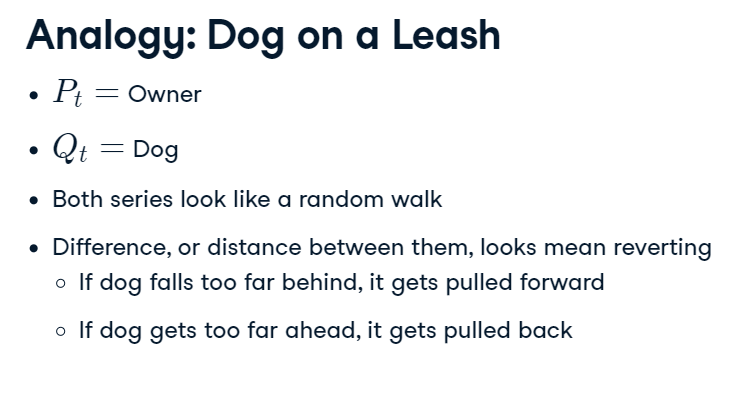

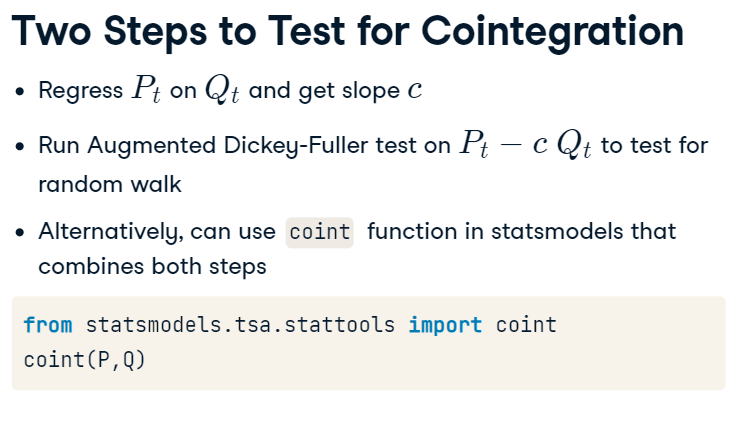

In [10]:
display(Image("./Image/Cointegrated.png"))
display(Image("./Image/Cointegrated_Ex.png"))
display(Image("./Image/Cointegrated_Test.png"))

In [33]:
google = pd.read_csv("google.csv", parse_dates = ["Date"], index_col = "Date").drop("Volume", axis = 1)
google.index = pd.date_range("2017-01-01", periods = 20)
google.head()

,Open,High,Low,Close
2017-01-01,778.81,789.63,775.80,786.14
2017-01-02,788.36,791.34,783.16,786.90
2017-01-03,786.08,794.48,785.02,794.02
2017-01-04,795.26,807.90,792.20,806.15
2017-01-05,806.40,809.97,802.83,806.65


In [34]:
import statsmodels.api as sm

google = sm.add_constant(google)
google.dropna(inplace = True)

results = sm.OLS(google.Low, google[["const", "High"]]).fit()

print(results.params[0])
print(results.params[1])
b = results.params[0]

adfuller(google["Low"]-b*google["High"])

92.09753718435604
0.874281062159743


(-0.928021541865981,
 0.7786045335667842,
 8,
 11,
 {'1%': -4.223238279489106,
  '5%': -3.189368925619835,
  '10%': -2.729839421487603},
 169.9135356633343)

C:\Users\okana\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


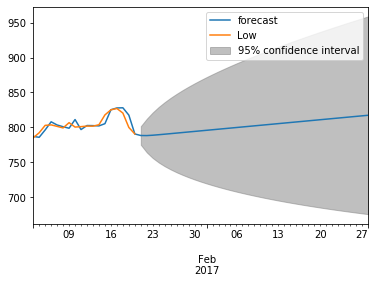

In [36]:
mod = ARIMA(google.Low, order = (1,1,1))
results = mod.fit()

results.plot_predict(start = "2017-01-03", end = "2017-02-28"); plt.show()